In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import itertools as iter
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad
from scipy.special import eval_hermite, eval_hermitenorm
from alea.polyquad.polynomials import StochasticHermitePolynomials
from alea.math_utils.multiindex_set import MultiindexSet
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# alea not normalised
# --- probabilist ---
h = StochasticHermitePolynomials(normalised=False)
# ...normalised probabilist
nh = StochasticHermitePolynomials(normalised=True)

# Mugler (2.5)
fac = np.math.factorial
def He(n, x):   # --- physicist ---
    return np.sum([(-1)**j*fac(n)*x**(n-2*j)/(fac(n-2*j)*fac(j)*2**j) for j in range(np.floor_divide(n, 2)+1)])

# scipy polynomials
def spH(n, x):  # --- physicist ---
    return eval_hermite(n, x)

def spHn(n, x): # --- probabilist ---
    return eval_hermitenorm(n, x)

## Check orthogonalities

In [5]:
print "He normality"
print [quad(lambda x: He(n, x)**2*np.exp(-x**2/2), -np.inf, np.inf)[0] / (np.sqrt(2*np.pi)*fac(n)) for n in range(1,10)]
print "h normality"
print [quad(lambda x: h.eval(n, x)**2*np.exp(-x**2/2), -np.inf, np.inf)[0] / (np.sqrt(2*np.pi)*fac(n)) for n in range(1,10)]
print "sample orthogonality"
p = lambda x: np.exp(-x**2/2) / np.sqrt(2*np.pi)
facmn = lambda m, n: np.sqrt(fac(m)*fac(n))
print np.array([[quad(lambda x: He(m, x)*He(n, x)*p(x), -np.inf, np.inf)[0] / facmn(m,n)
       for n in range(1,10)] for m in range(1,10)])

He normality
[1.0000000000000013, 1.0000000000000024, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000007, 1.0000000000000004, 1.0]
h normality
[1.0000000000000013, 1.0000000000000024, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000004, 1.0000000000000002, 0.99999999999999989]
sample orthogonality
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. -0.  0. -0.  0.]
 [ 0.  0.  1.  0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. -0.  0.]
 [ 0.  0. -0.  0.  1.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0. -0.  0. -0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [17]:
S = [1, 2.5, 2, 1.5, 1.1, 0.99, 0.9, 0.8, 0.5, 0.1, 0.01]
P = 10
dens = lambda x: np.exp(-x**2/2) / np.sqrt(2*np.pi)
facmn = lambda m, n: np.sqrt(fac(m)*fac(n))
for s in S:
    print "\n------- scaling %f --------\n" %s
    print np.array([[quad(lambda x: He(m, s*x)*He(n, x)*p(x), -np.inf, np.inf)[0] / facmn(m,n)
                     for n in range(1,P+1)] for m in range(1,P+1)])


------- scaling 1.000000 --------

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. -0.  0. -0.  0.  0.]
 [ 0.  0.  1.  0. -0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. -0.  0. -0.]
 [ 0.  0. -0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. -0.  0. -0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -0.  0.  0.  0.  0.  0.  1.]]

------- scaling 2.500000 --------

[[     2.5        0.         0.         0.        -0.         0.         0.         0.         0.         0.   ]
 [     0.         6.25       0.         0.         0.         0.         0.        -0.         0.         0.   ]
 [    16.075      0.        15.625      0.        -0.         0.         0.         0.         0.         0.   ]
 [     0.        56.833      0.        39.063      0.         0.         0.        -0.         0.        -0.   ]
 [    94.354      0.       183.427      0.   

## Examine consistency error due to different density functions

In [96]:
dens = lambda x, s: np.exp(-x**2/(s*2)) / np.sqrt(2*np.pi)

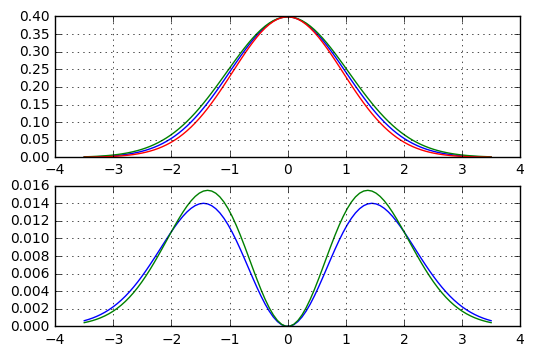

In [71]:
X = np.linspace(-3.5, 3.5, 100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(X, dens(X, 1))
ax1.plot(X, dens(X, 1.1))
ax1.plot(X, dens(X, 0.9))
#ax1.semilogy(X, dens(X, 1))
ax1.grid(True)

ax1 = fig.add_subplot(212)
ax1.plot(X, dens(X, 1.1) - dens(X, 1))
ax1.plot(X, dens(X, 1) - dens(X, 0.9))
ax1.grid(True)

In [72]:
e1 = lambda x: dens(x, 1) - dens(x, 0.9)
quad(e1, -np.inf, np.inf)[0] / quad(lambda x: dens(x, 1), -np.inf, np.inf)[0]

0.05131670194948604

In [73]:
QX, QW = np.polynomial.hermite.hermgauss(10)
np.sum(e1(QX) / dens(QX, 1) * QW)

0.047273955410003364

## Examine difference of "correction" densities $\zeta_{\theta\rho}$

In [99]:
zetat = lambda ym, t, sm: np.exp(-0.5*ym**2 * ((t*sm)**-2 - 1)) / (t*sm)

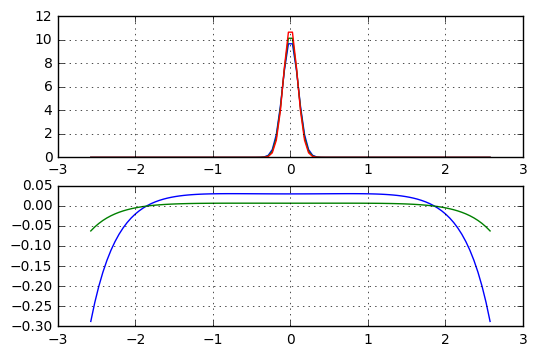

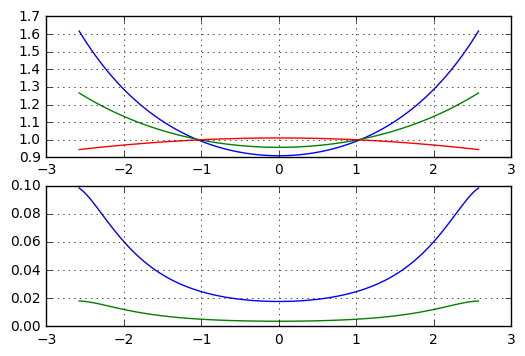

In [188]:
X1 = np.linspace(-2.576, 2.576, 100)    # 95% quantile
X2 = np.linspace(-10, 10, 100)

fig = plt.figure()
sm, rho = 0.1, 20

ax1 = fig.add_subplot(211)
ax1.plot(X1, zetat(X1, 1, sm))
ax1.plot(X1, zetat(X1, 0.95, sm))
ax1.plot(X1, zetat(X1, 0.9, sm))
ax1.grid(True)

ax1 = fig.add_subplot(212)
ax1.plot(X1, zetat(X1, 0.9*rho, sm) - zetat(X1, 0.95*rho, sm))
ax1.plot(X1, zetat(X1, 0.9*rho, sm) - zetat(X1, 0.91*rho, sm))
ax1.grid(True)

fig = plt.figure()
sm, rho = 1.1, 3

ax1 = fig.add_subplot(211)
ax1.plot(X1, zetat(X1, 1, sm))
ax1.plot(X1, zetat(X1, 0.95, sm))
ax1.plot(X1, zetat(X1, 0.9, sm))
ax1.grid(True)

ax1 = fig.add_subplot(212)
ax1.plot(X1, zetat(X1, 0.9*rho, sm) - zetat(X1, 0.95*rho, sm))
ax1.plot(X1, zetat(X1, 0.9*rho, sm) - zetat(X1, 0.91*rho, sm))
ax1.grid(True)

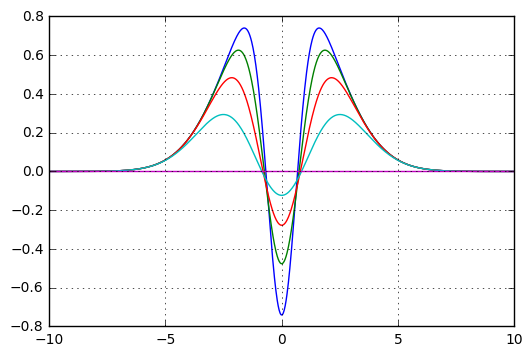

In [185]:
X1 = np.linspace(-10, 10, 1000)

fig = plt.figure()
sigma, rho = 0.1, 9      # NOTE: rho < 1/sigma required
tau = lambda t: (t*sigma)**-2
ax = lambda y, theta: 1/(rho*sigma) * np.exp(0.5*y**2)*(np.exp(-0.5*tau(rho)*y**2) - 1/theta * np.exp(-0.5*tau(theta*rho)*y**2))

ax1 = fig.add_subplot(111)
Y1 = [ax(X1, 0.5 + 0.1*i) for i in range(1,6)]
for Y in Y1:
    ax1.plot(X1, Y)
ax1.grid(True)

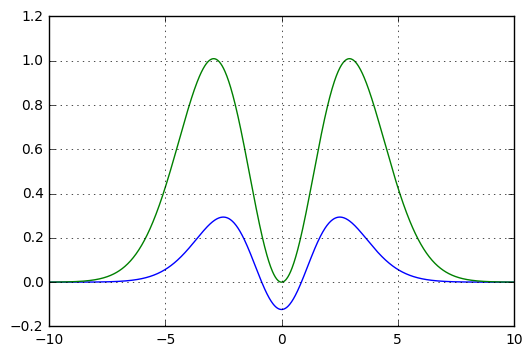

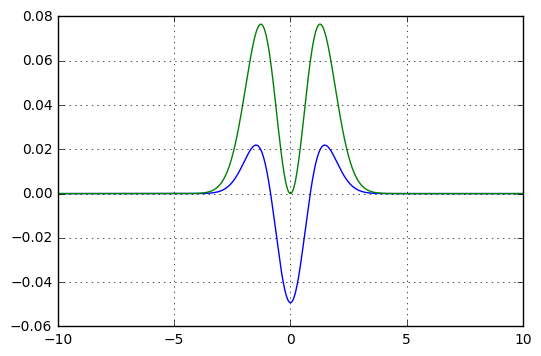

In [186]:
# ax is zeta consistency
# bx is upper bound of ax

bx = lambda y, theta: 1/(rho*sigma) * np.abs(tau(rho)-tau(theta*rho))*y**2*np.exp(-0.5*(tau(rho)-1)*y**2)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(X1, ax(X1, 0.9))
ax1.plot(X1, bx(X1, 0.9))
ax1.grid(True)

Z = 1/np.sqrt(2*np.pi)*np.exp(-0.5*X1**2)     # standard Gauss measure
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(X1, Z*ax(X1, 0.9))
ax1.plot(X1, Z*bx(X1, 0.9))
ax1.grid(True)